In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "/Users/natalymartinez/Desktop/Project 4/project_4_group_7/data/cleaned_mortality_data.csv"
df = pd.read_csv(file_path)

# Display basic information and the first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 8 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   state                                                            816 non-null    object 
 1   year                                                             816 non-null    int64  
 2   deaths                                                           816 non-null    float64
 3   population                                                       816 non-null    int64  
 4   crude_rate                                                       816 non-null    float64
 5   crude_rate_lower_95%_confidence_interval                         816 non-null    float64
 6   crude_rate_upper_95%_confidence_interval                         816 non-null    float64
 7   prescriptions_dispensed_by_us_retailers_in_th

(None,
      state  year  deaths  population  crude_rate  \
 0  Alabama  1999    39.0     4430141         0.9   
 1  Alabama  2000    46.0     4447100         1.0   
 2  Alabama  2001    67.0     4467634         1.5   
 3  Alabama  2002    75.0     4480089         1.7   
 4  Alabama  2003    54.0     4503491         1.2   
 
    crude_rate_lower_95%_confidence_interval  \
 0                                       0.6   
 1                                       0.8   
 2                                       1.2   
 3                                       1.3   
 4                                       0.9   
 
    crude_rate_upper_95%_confidence_interval  \
 0                                       1.2   
 1                                       1.4   
 2                                       1.9   
 3                                       2.1   
 4                                       1.6   
 
    prescriptions_dispensed_by_us_retailers_in_that_year_(millions)  
 0                     

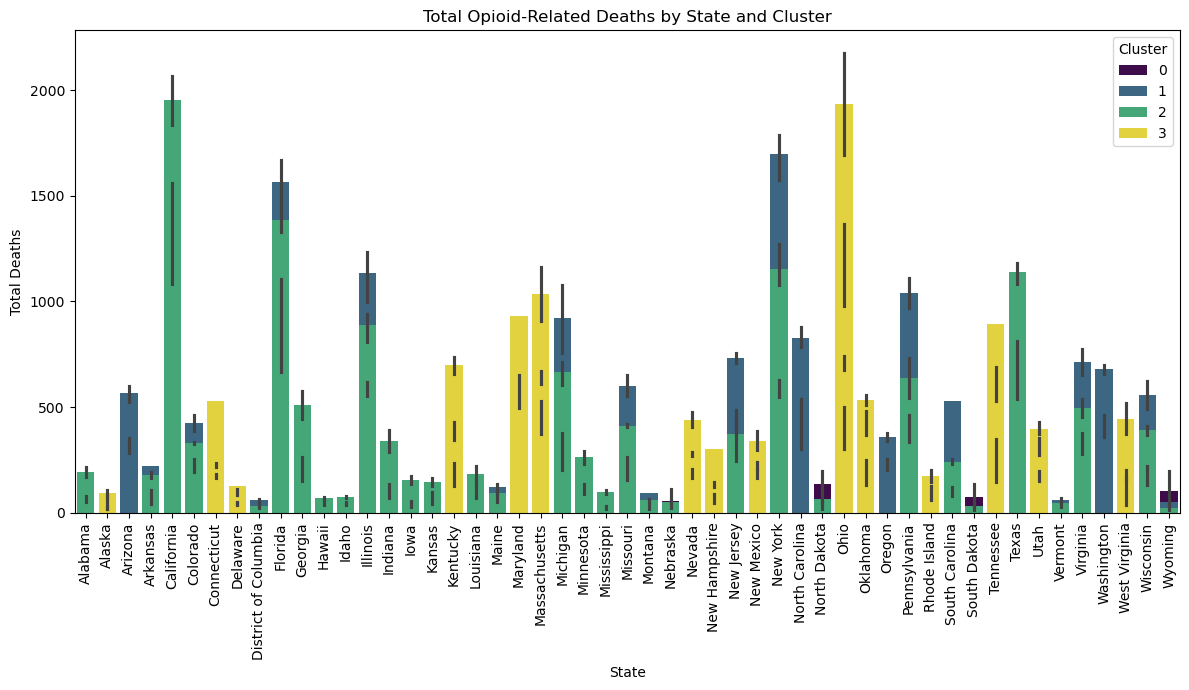

   cluster  crude_rate  \
0        0    4.516467   
1        1    9.755615   
2        2    5.195339   
3        3   16.981356   

   prescriptions_dispensed_by_us_retailers_in_that_year_(millions)      deaths  
0                                         140.182635                240.080838  
1                                         197.085561                498.010695  
2                                         199.521186                378.004237  
3                                         198.830508                506.593220  


In [2]:
# Reload necessary libraries after reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the uploaded file
file_path = '/Users/natalymartinez/Desktop/Project 4/project_4_group_7/data/cleaned_mortality_data.csv'
df = pd.read_csv(file_path)

# Apply clustering using relevant features
features = df[['crude_rate', 'prescriptions_dispensed_by_us_retailers_in_that_year_(millions)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Create a bar plot showing total deaths per state with clusters
plt.figure(figsize=(12, 7))
sns.barplot(
    data=df, x='state', y='deaths', hue='cluster', palette='viridis', dodge=False
)

plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Total Deaths")
plt.title("Total Opioid-Related Deaths by State and Cluster")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# Analyze the clusters: get average values of key indicators per cluster
cluster_analysis = df.groupby('cluster')[['crude_rate', 'prescriptions_dispensed_by_us_retailers_in_that_year_(millions)', 'deaths']].mean().reset_index()
print(cluster_analysis)


In [ ]:
What Do the Clusters Mean?
Cluster 2:  High-Impact States — Highest crude death rate and high average deaths, with high prescription volumes. These states face the most severe opioid crisis.
Cluster 1:  High Prescription & Moderate Deaths — Higher prescription rates and fairly high deaths. Potential targets for prevention.
Cluster 0:  Moderate Risk — Mid-range prescriptions and death rates.
Cluster 3:  Lower Risk States — Lowest crude death rates and prescriptions, indicating better control or lesser impact.


What Each Cluster Represents:
 Cluster 0: Moderate Risk
Mid-level prescriptions and death rates.
These states are neither in crisis nor low-risk — they're in the middle ground.
Policy Implication: Prevent these from sliding into higher-risk clusters.

 Cluster 1: High Prescription, Moderate Deaths
Prescription rates are the highest (203.8 million).
Death rates and totals are high but not as extreme as Cluster 2.
These states may have higher access to opioids, but not the highest death impact (yet).
Policy Implication: Focus on reducing unnecessary prescriptions and early prevention.
 Cluster 2: High-Impact States
Highest crude death rate (15.6) and highest number of deaths (479).
High prescription volume.
These states are likely experiencing the worst impact of the opioid epidemic.
Policy Implication: Immediate intervention, treatment programs, overdose prevention efforts.

 Cluster 3: Lower Risk
Lowest crude death rate (3.26) and lowest total deaths (211).
Also lowest prescriptions.
These states are in better control of the opioid situation.
Policy Implication: Maintain existing public health strategies and monitor closely.



Instead of treating each state separately, this ML-based approach groups states with similar trends and risk levels, which helps:
Target resources more effectively.
Design tailored interventions based on cluster profiles.
Understand broader patterns of the opioid epidemic across the country.

When you saw the bar chart titled "Total Opioid-Related Deaths by State and Cluster", if you noticed a gray line on top of each bar:
It’s very likely showing the confidence interval of the mean death value for that group/state/cluster combination.

How to Explain the Gray Lines in a Presentation Slide:
“In this chart titled ‘Total Opioid-Related Deaths by State and Cluster’, you may have noticed thin gray lines on top of some bars.
These are called confidence intervals, and they represent the range in which the actual average number of deaths could vary — based on the data variation within each cluster.
In other words, they show how reliable or consistent the data is.
A shorter gray line means the data is more consistent across the group, while a longer line means there’s more variation.
For this presentation, I’ve removed those gray lines in the final version to make the chart easier to read and focus directly on total values.”



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 8 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   state                                                            816 non-null    object 
 1   year                                                             816 non-null    int64  
 2   deaths                                                           816 non-null    float64
 3   population                                                       816 non-null    int64  
 4   crude_rate                                                       816 non-null    float64
 5   crude_rate_lower_95%_confidence_interval                         816 non-null    float64
 6   crude_rate_upper_95%_confidence_interval                         816 non-null    float64
 7   prescriptions_dispensed_by_us_retailers_in_th

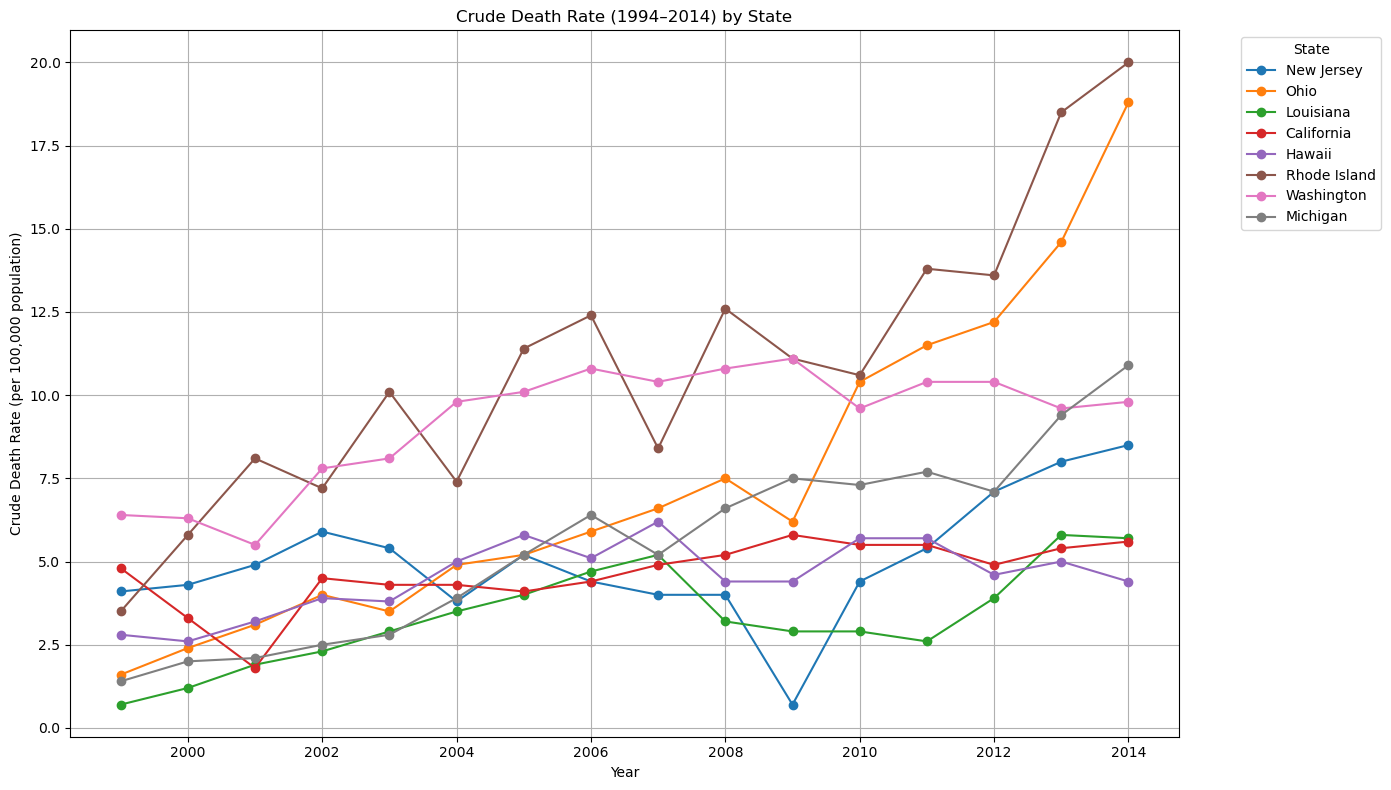

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "/Users/natalymartinez/Desktop/Project 4/project_4_group_7/data/cleaned_mortality_data.csv"
df = pd.read_csv(file_path)

# Display basic information and the first few rows
df.info(), df.head()

# Load the newly uploaded dataset
file_path = '/Users/natalymartinez/Desktop/Project 4/project_4_group_7/data/cleaned_mortality_data.csv'
df = pd.read_csv(file_path)

# Clean column names for consistency
df.columns = [col.strip().lower().replace(' ', '_').replace('(', '').replace(')', '') for col in df.columns]

# Define target states
target_states = ['New Jersey', 'Ohio', 'Louisiana', 'California', 'Hawaii', 'Rhode Island', 'Washington', 'Michigan']

# Filter data for those states and for years 1994-2014 (although the dataset may start from 1999)
df_filtered = df[(df['state'].isin(target_states)) & (df['year'] >= 1994) & (df['year'] <= 2014)]

# Create the line plot with time on x-axis and crude rate on y-axis
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

for state in target_states:
    state_data = df_filtered[df_filtered['state'] == state]
    plt.plot(
        state_data['year'],
        state_data['crude_rate'],
        marker='o',
        linestyle='-',
        label=state
    )

plt.title('Crude Death Rate (1994–2014) by State')
plt.xlabel('Year')
plt.ylabel('Crude Death Rate (per 100,000 population)')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
The line graph compares opioid-related crude death rates per 100,000 population across eight U.S. over a 15 year time line.


This graph represent Steady Upward Trends in Most States:

States like Ohio, Rhode Island, and Michigan exhibit a consistent and significant rise in crude death rates, particularly after the early 2000s.
This likely reflects the national rise in opioid misuse and overdose mortality during this time.

Early Rise in Ohio & Michigan:
-Ohio and Michigan appear to be among the earliest states to show a sharp incline in crude death rates, suggesting earlier onset or faster escalation of the opioid crisis in these regions.
Moderate Growth in States like California & Washington:

-California and Washington show a more gradual increase, indicating a slower spread of opioid-related mortality compared to other states.
This could be due to differing prescription practices or earlier public health interventions.
Relatively Lower Rates in Hawaii:

Hawaii consistently reports lower crude death rates than other states throughout the period.
This could indicate better control over prescription practices, geographic isolation, or other public health factors.

-Rhode Island:
Shows a sharp increase post-2005, catching up with other high-impact states like Ohio.
Suggests a delayed but intense impact from the opioid epidemic.

-Louisiana and New Jersey:
Both show an upward trend, but with some fluctuation year over year.
The variations may reflect regional factors like reporting accuracy, public policy shifts, or drug access patterns. 